In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import os

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Speech Emotion Recognition/data/AudioWAV/'
audio_path = []
audio_emotion = []

In [4]:
# collects all the audio filename in the variable 'path'
directory_path = os.listdir(path)

In [5]:
for audio in directory_path:
    audio_path.append(path + audio)
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")

In [6]:
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
#print(len(dataset))
print(dataset.head())
# print(dataset['File Path'][55])

                                                Path Emotions
0  /content/drive/MyDrive/Speech Emotion Recognit...  neutral
1  /content/drive/MyDrive/Speech Emotion Recognit...    angry
2  /content/drive/MyDrive/Speech Emotion Recognit...     fear
3  /content/drive/MyDrive/Speech Emotion Recognit...    angry
4  /content/drive/MyDrive/Speech Emotion Recognit...    angry


## Visualization

<Axes: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

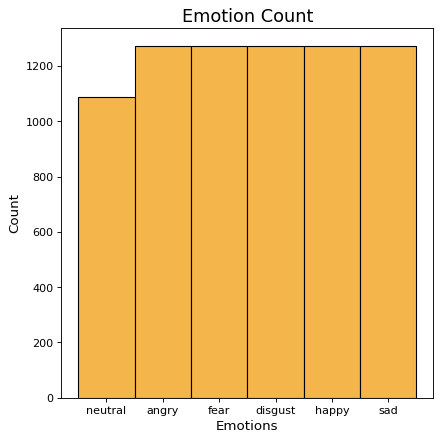

In [7]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')
#plt.show()

## Showing spectrogram and waveplot

In [8]:
emotion_sad = dataset[dataset['Emotions']=='sad']['Path']
print(type(emotion_sad))

<class 'pandas.core.series.Series'>


In [9]:
#choosing a file to plot wave and spectogram
#print(emotion_sad.values[542])
data_path = emotion_sad.values[542]
data, sampling_rate = librosa.load(data_path)

### Waveplot

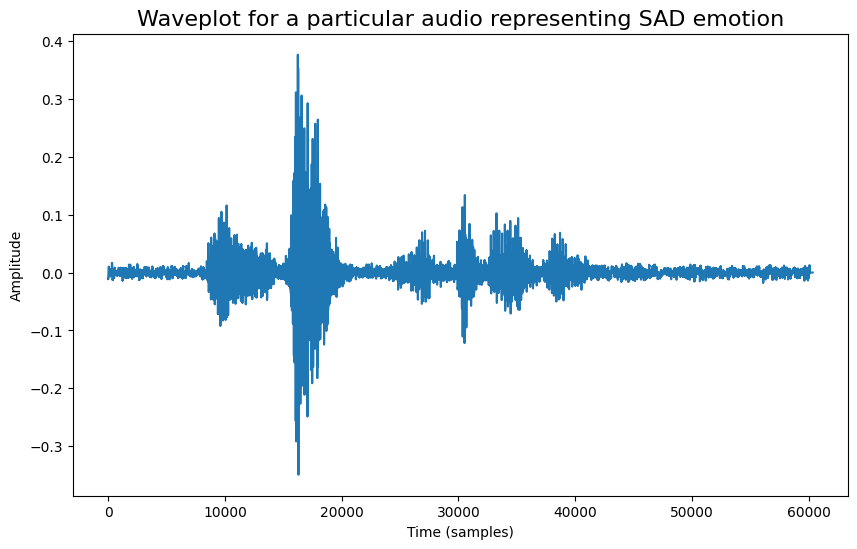

In [10]:
# Afficher le waveplot
plt.figure(figsize=(10, 6))
plt.title("Waveplot for a particular audio representing SAD emotion", size=16)
plt.plot(data)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

### Spectogram

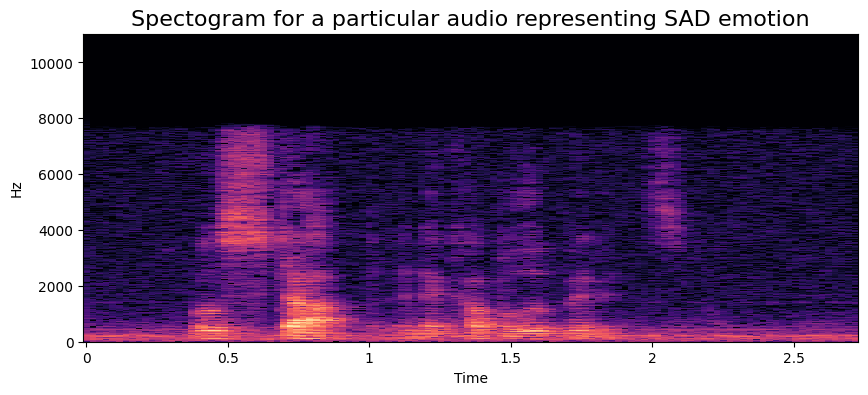

In [11]:
plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing SAD emotion", size=16)
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
#plt.show()

## Augmentation (Noise Injection)

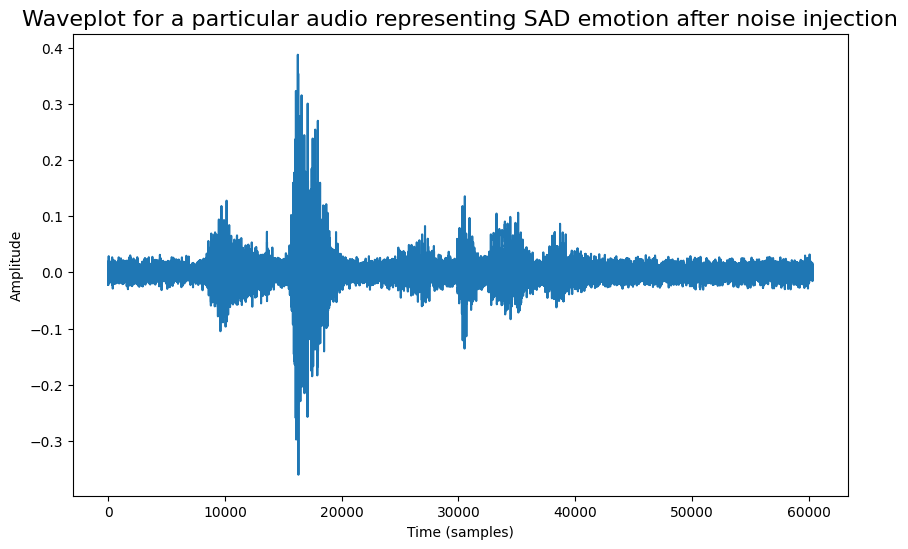

In [12]:
# for audio processing accuracy
# add noise to audio and check how the waveplot changes
# also the observing the change in audio quality

## Augmentation (Noise Injection)
noise_amp = 0.035*np.random.uniform()*np.amax(data)
audio_injected_data = data + noise_amp*np.random.normal(size=data.shape[0])

# waveplot view after noise injection:
plt.figure(figsize=(10, 6))
plt.title("Waveplot for a particular audio representing SAD emotion after noise injection", size=16)
plt.plot(audio_injected_data)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

## Feature extraction

### Creating a DF with extracted Feautures

In [13]:
X, Y = [], []
print("Feature processing...")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # noise injection
    noise_amp = 0.035 * np.random.uniform() * np.amax(value)
    value = value + noise_amp * np.random.normal(size=value.shape[0])
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    #print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)

Feature processing...


In [14]:
# print(X)
# print(Y)
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
#print(extracted_audio_df.isna().any())

(7451, 30457)
               0          1          2          3          4          5  \
7441 -703.388784 -29.451732 -27.755411  28.826637  16.242809  -0.335455   
7442 -690.235623 -52.280241 -12.753546  14.746848  10.762196  -1.605368   
7443 -677.555921 -30.436431  -7.168390  25.720978   6.808361 -12.096483   
7444 -806.630834 -19.378106 -27.118162  31.890574  18.037300  -1.097734   
7445 -756.696687 -37.100224 -22.270080  30.875640  17.476862 -12.251802   
7446 -569.389244 -66.599370 -14.131783   6.123854  -0.554386  -3.490905   
7447 -729.462968 -10.931021 -22.810569  28.377773  -0.733539  -6.294749   
7448 -687.288449 -58.161390 -25.343181  28.039463  17.560132  -6.421471   
7449 -689.448589 -18.794128  13.030515   8.948246  16.332238   7.410557   
7450 -516.457847 -75.559050 -20.749243  22.600876  19.918087  -8.876253   

              6          7          8          9  ...  30447  30448  30449  \
7441 -12.185880  -6.041846  -5.133597  -6.375600  ...    NaN    NaN    NaN   
7442

## Training

In [15]:
# preparing to train
X = extracted_audio_df.drop(labels='emotion_of_audio', axis= 1)
Y = extracted_audio_df['emotion_of_audio']

x_train, x_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model creation and fitting

In [17]:
mlp_model = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model.fit(x_train,y_train)

MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

## Accuracy calculation

In [18]:
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.85%


## Prediction verification

In [19]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual Predict
4983  neutral     sad
3790     fear   angry
4206  disgust   happy
6424     fear    fear
4149    happy   happy
